## Importing Libraries

In [1]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap
from IPython import get_ipython
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from yellowbrick.cluster.elbow import kelbow_visualizer
from yellowbrick.cluster import SilhouetteVisualizer

pd.set_option('display.precision', 3)
%matplotlib inline

## Importing Excel File

In [5]:
os.chdir(r"C:\Users\Priya Sharma\OneDrive\Desktop\EcommerceAnalytics (1)\Ecommerce Analytics")
df=pd.read_excel("E-com_Data.xlsx")

In [6]:
## Understanding Data
df.shape
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537979 entries, 0 to 537978
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   CustomerID         404189 non-null  float64       
 1   Item Code          537979 non-null  object        
 2   InvoieNo           537979 non-null  int64         
 3   Date of purchase   537979 non-null  datetime64[ns]
 4   Quantity           537979 non-null  int64         
 5   Time               537979 non-null  object        
 6   price per Unit     537979 non-null  float64       
 7   Price              537979 non-null  float64       
 8   Shipping Location  537979 non-null  object        
 9   Cancelled_status   8345 non-null    float64       
 10  Reason of return   3 non-null       object        
 11  Sold as set        0 non-null       float64       
dtypes: datetime64[ns](1), float64(5), int64(2), object(4)
memory usage: 49.3+ MB


,CustomerID,Item Code,InvoieNo,Date of purchase,Quantity,Time,price per Unit,Price,Shipping Location,Cancelled_status,Reason of return,Sold as set
0,4355.0,15734,398177,2017-10-29,6,15:36:00,321.0,1926.0,Location 1,NaN,NaN,NaN
1,4352.0,14616,394422,2017-10-05,2,14:53:00,870.0,1740.0,Location 1,NaN,NaN,NaN
2,4352.0,14614,394422,2017-10-12,2,14:53:00,933.0,1866.0,Location 1,NaN,NaN,NaN
3,4352.0,85014B,388633,2017-08-22,3,14:47:00,623.0,1869.0,Location 1,NaN,NaN,NaN
4,4352.0,15364,394422,2017-10-10,2,14:53:00,944.0,1888.0,Location 1,NaN,NaN,NaN


In [7]:
## Checking null vaues
df.isnull().sum().sort_values(ascending=False)

Sold as set          537979
Reason of return     537976
Cancelled_status     529634
CustomerID           133790
Item Code                 0
InvoieNo                  0
Date of purchase          0
Quantity                  0
Time                      0
price per Unit            0
Price                     0
Shipping Location         0
dtype: int64

In [8]:
## Fixing Null Values
## Removing Insignificant Columns
df1=df.copy()
df1.drop(['Reason of return','Sold as set'], axis=1, inplace=True)
## Deleting Rows for CustomerID with Null Values
df1.dropna(subset=['CustomerID'], inplace=True)
## Checking null values
df1.isnull().sum().sort_values(ascending=False)

Cancelled_status     396006
CustomerID                0
Item Code                 0
InvoieNo                  0
Date of purchase          0
Quantity                  0
Time                      0
price per Unit            0
Price                     0
Shipping Location         0
dtype: int64

In [9]:
## Renaming Columns

df1.rename(columns={'Item Code': 'Item_Code', 'Date of purchase': 'Date_of_purchase', 'price per Unit': 'price_per_unit', 'Shipping Location': 'Shipping_Location', 'Price': 'Revenue', 'InvoieNo': 'InvoiceNo'}, inplace=True)

In [10]:
## Fixing Data Types

df1['CustomerID'] = df1['CustomerID'].astype('int64')
df1['InvoiceNo'] = df1['InvoiceNo'].astype('str')
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 404189 entries, 0 to 537949
Data columns (total 10 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   CustomerID         404189 non-null  int64         
 1   Item_Code          404189 non-null  object        
 2   InvoiceNo          404189 non-null  object        
 3   Date_of_purchase   404189 non-null  datetime64[ns]
 4   Quantity           404189 non-null  int64         
 5   Time               404189 non-null  object        
 6   price_per_unit     404189 non-null  float64       
 7   Revenue            404189 non-null  float64       
 8   Shipping_Location  404189 non-null  object        
 9   Cancelled_status   8183 non-null    float64       
dtypes: datetime64[ns](1), float64(3), int64(2), object(4)
memory usage: 33.9+ MB


In [11]:
## Checking for Duplicate Rows

duplicate = df1[df1.duplicated()]
print("Duplicate Rows :")
duplicate

#Removing Duplicate Rows

df1.drop_duplicates(subset=None,keep='first',inplace=True)

## Shape of the Data aftr Pre-Processing
df1.shape

Duplicate Rows :


(404181, 10)

In [12]:
## File for EDA in Excel
#df1.to_excel('EDA.xlsx')

In [13]:
## Dropping Insignificant columns for RFM
df1.drop(['Item_Code','Quantity','Time','price_per_unit','Shipping_Location','Cancelled_status'],axis=1,inplace=True)

In [14]:
df1.shape

(404181, 4)

In [15]:
df1.head()

,CustomerID,InvoiceNo,Date_of_purchase,Revenue
0,4355,398177,2017-10-29,1926.0
1,4352,394422,2017-10-05,1740.0
2,4352,394422,2017-10-12,1866.0
3,4352,388633,2017-08-22,1869.0
4,4352,394422,2017-10-10,1888.0


In [16]:
# Deleting CustomerID where sum of Price is <= 0 #
dfneg = pd.DataFrame(df1.groupby(['CustomerID'])['Revenue'].sum()<=0)
dfneg.columns = ['DI']
dfneg.DI.value_counts()

False    4319
True       30
Name: DI, dtype: int64

In [17]:
df1 = pd.merge(df1,dfneg,on ='CustomerID',how ='left')

In [18]:
df1 = df1[df1['DI'] == False]
df1 = df1.drop(['DI'], axis=1)
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 403843 entries, 0 to 404180
Data columns (total 4 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   CustomerID        403843 non-null  int64         
 1   InvoiceNo         403843 non-null  object        
 2   Date_of_purchase  403843 non-null  datetime64[ns]
 3   Revenue           403843 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 15.4+ MB


In [19]:
## RFM
##Grouping the Customer Data by Invoice ID
rfm_df=df1.groupby(['CustomerID']).agg({'InvoiceNo':'nunique', 'Revenue':'sum','Date_of_purchase':['min','max']})


## Calculating RFM Values
rfm_df.columns=['count','Total','min_date','max_date']
max_date=rfm_df['max_date'].max()
rfm_df['Recency'] = max_date-rfm_df['max_date']
rfm_df['Recency'] = rfm_df['Recency'].dt.days+1
rfm_df['Frequency'] = rfm_df['count']
rfm_df['Monetary'] = rfm_df['Total']
rfm_df=rfm_df.drop(['count','Total','min_date','max_date'],axis=1)
rfm_df.info()
rfm_df.shape


<class 'pandas.core.frame.DataFrame'>
Int64Index: 4319 entries, 2 to 4372
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Recency    4319 non-null   int64  
 1   Frequency  4319 non-null   int64  
 2   Monetary   4319 non-null   float64
dtypes: float64(1), int64(2)
memory usage: 135.0 KB


(4319, 3)

In [20]:
rfm_df.head()

,Recency,Frequency,Monetary
CustomerID,,,
2,4,7,553704.0
3,77,4,257404.0
4,19,1,176613.0
5,311,1,41976.0
6,37,8,151822.0


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

<AxesSubplot:xlabel='Monetary', ylabel='Density'>

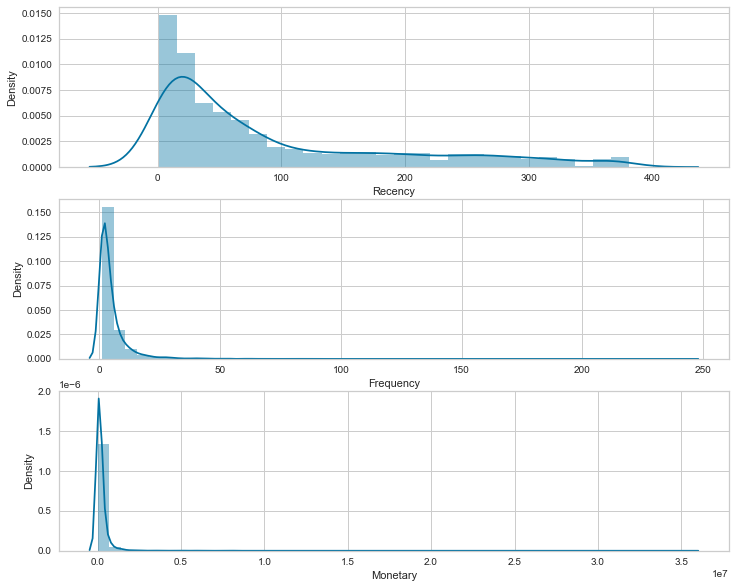

In [21]:
## Univariate Analyis of RFM Values
rfm_stats = pd.DataFrame(rfm_df.describe())
plt.figure(figsize=(12,10))
# Plot distribution of Recency
plt.subplot(3, 1, 1); sns.distplot(rfm_df['Recency'])
# Plot distribution of Frequency
plt.subplot(3, 1, 2); sns.distplot(rfm_df['Frequency'])
# Plot distribution of Monetary Value
plt.subplot(3, 1, 3); sns.distplot(rfm_df['Monetary'])

{'whiskers': [<matplotlib.lines.Line2D at 0x1c5d8551400>,
 'caps': [<matplotlib.lines.Line2D at 0x1c5d8551b20>,
 'boxes': [<matplotlib.lines.Line2D at 0x1c5d8551070>],
 'medians': [<matplotlib.lines.Line2D at 0x1c5d8550280>],
 'fliers': [<matplotlib.lines.Line2D at 0x1c5d8550610>],
 'means': []}

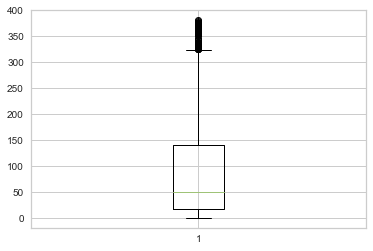

In [22]:
plt.boxplot(rfm_df.Recency)

{'whiskers': [<matplotlib.lines.Line2D at 0x1c5dc4b2d30>,
 'caps': [<matplotlib.lines.Line2D at 0x1c5dc4a5490>,
 'boxes': [<matplotlib.lines.Line2D at 0x1c5dc4b29a0>],
 'medians': [<matplotlib.lines.Line2D at 0x1c5dc4a5bb0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1c5dc4a5f40>],
 'means': []}

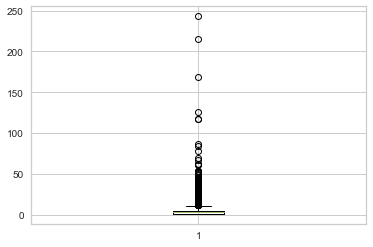

In [23]:
plt.boxplot(rfm_df.Frequency)

{'whiskers': [<matplotlib.lines.Line2D at 0x1c5dee0c7c0>,
 'caps': [<matplotlib.lines.Line2D at 0x1c5dee0cee0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1c5dee0c430>],
 'medians': [<matplotlib.lines.Line2D at 0x1c5dedf0640>],
 'fliers': [<matplotlib.lines.Line2D at 0x1c5dedf09d0>],
 'means': []}

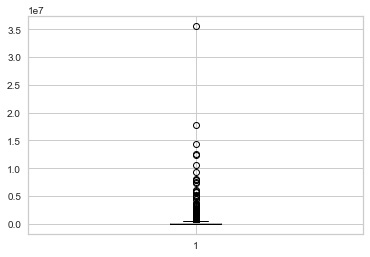

In [24]:
plt.boxplot(rfm_df.Monetary)

In [25]:
## Fix Skewness and Updating outliers ##


rQ1 = np.quantile(rfm_df.Recency,.25)
rQ3 = np.quantile(rfm_df.Recency,.75)
rIQR = rQ3 - rQ1
rUB = rQ3 + 1.5*rIQR
rLB = rQ1 - 1.5*rIQR
rUB
rLB

len(rfm_df[rfm_df.Recency>rUB])
rfm_df['Recency'] = np.where(rfm_df['Recency'] > rUB, rUB,rfm_df['Recency'])


fQ1 = np.quantile(rfm_df.Frequency,.25)
fQ3 = np.quantile(rfm_df.Frequency,.75)
fIQR = fQ3 - fQ1
fUB = fQ3 + 1.5*fIQR
fLB = fQ1 - 1.5*fIQR
fUB

len(rfm_df[rfm_df.Frequency>fUB])
#382/4319
rfm_df['Frequency'] = np.where(rfm_df['Frequency'] > fUB, fUB,rfm_df['Frequency'])

mQ1 = np.quantile(rfm_df.Monetary,.25)
mQ3 = np.quantile(rfm_df.Monetary,.75)
mIQR = mQ3 - mQ1
mUB = mQ3 + 1.5*mIQR
mLB = mQ1 - 1.5*mIQR
mUB
len(rfm_df[rfm_df.Monetary>mLB])
#415/4319
rfm_df['Monetary'] = np.where(rfm_df['Monetary'] > mUB, mUB,rfm_df['Monetary'])


{'whiskers': [<matplotlib.lines.Line2D at 0x1c5d85e2e50>,
 'caps': [<matplotlib.lines.Line2D at 0x1c5d85d65b0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1c5d85e2ac0>],
 'medians': [<matplotlib.lines.Line2D at 0x1c5d85d6cd0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1c5d86080a0>],
 'means': []}

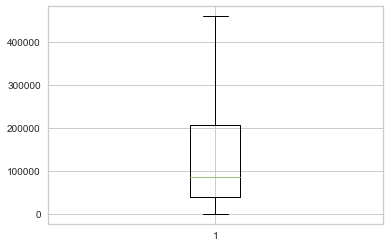

In [26]:
#boxplot after outlier correction
plt.boxplot(rfm_df.Monetary)

{'whiskers': [<matplotlib.lines.Line2D at 0x1c5d7af0460>,
 'caps': [<matplotlib.lines.Line2D at 0x1c5d7af0b80>,
 'boxes': [<matplotlib.lines.Line2D at 0x1c5d7af00d0>],
 'medians': [<matplotlib.lines.Line2D at 0x1c5d7b082e0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1c5d7b08670>],
 'means': []}

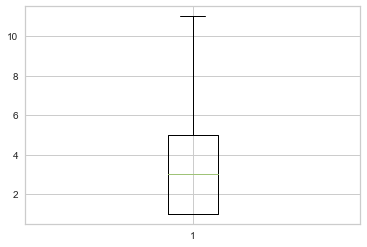

In [27]:
plt.boxplot(rfm_df.Frequency)

{'whiskers': [<matplotlib.lines.Line2D at 0x1c5e63dfd00>,
 'caps': [<matplotlib.lines.Line2D at 0x1c5e63ba460>,
 'boxes': [<matplotlib.lines.Line2D at 0x1c5e63df970>],
 'medians': [<matplotlib.lines.Line2D at 0x1c5e63bab80>],
 'fliers': [<matplotlib.lines.Line2D at 0x1c5e63baf10>],
 'means': []}

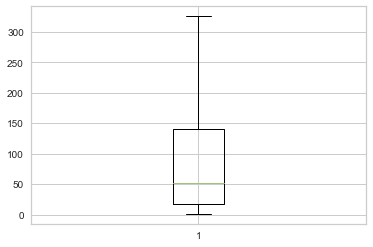

In [28]:
plt.boxplot(rfm_df.Recency)

In [29]:
#RFM Grouping using statistical approach
#Split into four segments using quantiles
quantiles = rfm_df.quantile(q=[0.25,0.5,0.75])
quantiles = quantiles.to_dict()
quantiles

{'Recency': {0.25: 18.0, 0.5: 51.0, 0.75: 141.0},
 'Frequency': {0.25: 1.0, 0.5: 3.0, 0.75: 5.0},
 'Monetary': {0.25: 38585.0, 0.5: 84965.0, 0.75: 206819.0}}

In [30]:
#Calculate and Add RFMScore value column showing total sum of RFMGroup values
def RScoring(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]: 
        return 3
    else:
        return 4
    
def FnMScoring(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]: 
        return 2
    else:
        return 1

In [31]:
rfm_df['R'] = rfm_df['Recency'].apply(RScoring, args=('Recency',quantiles,))
rfm_df['F'] = rfm_df['Frequency'].apply(FnMScoring, args=('Frequency',quantiles,))
rfm_df['M'] = rfm_df['Monetary'].apply(FnMScoring, args=('Monetary',quantiles,))
rfm_df['RFMGroup'] = rfm_df.R.map(str) + rfm_df.F.map(str) + rfm_df.M.map(str)
rfm_df['RFMScore'] = rfm_df[['R', 'F', 'M']].sum(axis = 1)
rfm_df.head()

,Recency,Frequency,Monetary,R,F,M,RFMGroup,RFMScore
CustomerID,,,,,,,,
2,4.0,7.0,459170.0,1,1,1,111,3
3,77.0,4.0,257404.0,3,2,1,321,6
4,19.0,1.0,176613.0,2,4,2,242,8
5,311.0,1.0,41976.0,4,4,3,443,11
6,37.0,8.0,151822.0,2,1,2,212,5


In [32]:
## Assigning Loyalty level to Scores
Loyalty_Level = [0, 1, 2]
Score_cuts = pd.qcut(rfm_df.RFMScore, q = 3, labels = Loyalty_Level)
rfm_df['RFM_Loyalty_Level'] = Score_cuts.values
rfm_df.reset_index().head(50)

,CustomerID,Recency,Frequency,Monetary,R,F,M,RFMGroup,RFMScore,RFM_Loyalty_Level
0,2,4.0,7.0,459170.0,1,1,1,111,3,0
1,3,77.0,4.0,257404.0,3,2,1,321,6,0
2,4,19.0,1.0,176613.0,2,4,2,242,8,1
3,5,311.0,1.0,41976.0,4,4,3,443,11,2
4,6,37.0,8.0,151822.0,2,1,2,212,5,0
5,7,208.0,1.0,9410.0,4,4,4,444,12,2
6,8,233.0,1.0,135550.0,4,4,2,442,10,2
7,9,215.0,1.0,65832.0,4,4,3,443,11,2
8,10,25.0,3.0,331601.0,2,3,1,231,6,0
9,11,34.0,1.0,459170.0,2,4,1,241,7,1


In [33]:
# 3d plot
get_ipython().run_line_magic('matplotlib', 'qt')
fig = plt.figure(figsize=(6,6))
ax = Axes3D(fig, auto_add_to_figure=False)
fig.add_axes(ax)
# get colormap from seaborn
cmap = ListedColormap(sns.color_palette("hls", 3).as_hex())
# plot
sc = ax.scatter(rfm_df.Recency, rfm_df.Frequency, rfm_df.Monetary, s=40, c=rfm_df.RFM_Loyalty_Level, marker='o', cmap=cmap, alpha=1)
ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary')
# legend
plt.legend(*sc.legend_elements(), bbox_to_anchor=(1.05, 1), loc=2)
# save
plt.savefig("rfm_3dplot1", bbox_inches='tight')
#plt.show()
get_ipython().run_line_magic('matplotlib', 'inline')

In [34]:
## Assigning Loyalty level Names to Scores
Loyalty_Level = ['Platinum', 'Gold', 'Silver']
Score_cuts = pd.qcut(rfm_df.RFMScore, q = 3, labels = Loyalty_Level)
rfm_df['RFM_Loyalty_Level'] = Score_cuts.values
rfm_df.head(50)

,Recency,Frequency,Monetary,R,F,M,RFMGroup,RFMScore,RFM_Loyalty_Level
CustomerID,,,,,,,,,
2,4.0,7.0,459170.0,1,1,1,111,3,Platinum
3,77.0,4.0,257404.0,3,2,1,321,6,Platinum
4,19.0,1.0,176613.0,2,4,2,242,8,Gold
5,311.0,1.0,41976.0,4,4,3,443,11,Silver
6,37.0,8.0,151822.0,2,1,2,212,5,Platinum
7,208.0,1.0,9410.0,4,4,4,444,12,Silver
8,233.0,1.0,135550.0,4,4,2,442,10,Silver
9,215.0,1.0,65832.0,4,4,3,443,11,Silver
10,25.0,3.0,331601.0,2,3,1,231,6,Platinum


In [35]:
rfm_df.shape

(4319, 9)

In [36]:
rfm_df.groupby(['RFM_Loyalty_Level']).mean()
rfm_df.RFM_Loyalty_Level.value_counts()

Platinum    1584
Silver      1389
Gold        1346
Name: RFM_Loyalty_Level, dtype: int64

In [37]:
## RFM Scores Univariate Analysis

rfm_df.RFMScore.min()

3

In [38]:
rfm_df.RFMScore.max()

12

In [39]:
rfm_df.RFMScore.median()

8.0

In [40]:
rfm_df.RFMScore.mode()[0]

10

In [41]:
rfm_df.RFMScore.mean()

7.6441305857837465

In [42]:
rfm_df.RFMScore.unique()

array([ 3,  6,  8, 11,  5, 12, 10,  7,  9,  4], dtype=int64)

In [43]:
rfm_df.RFMScore.value_counts()

10    517
9     505
3     497
11    452
8     451
12    420
7     390
6     374
5     363
4     350
Name: RFMScore, dtype: int64

In [44]:
rfm_df.shape

(4319, 9)

In [45]:
## Number of Customers in Loyalty Levels
rfm_df.RFM_Loyalty_Level.value_counts()

Platinum    1584
Silver      1389
Gold        1346
Name: RFM_Loyalty_Level, dtype: int64

In [46]:
#Fixing Skewness
#Perform Log transformation to bring data into normal or near normal distribution
Log_Tfd_Data = rfm_df[['Recency', 'Frequency', 'Monetary']].apply(np.log, axis = 1).round(3)
Log_Tfd_Data.describe()
rfm_df.describe()

,Recency,Frequency,Monetary,R,F,M,RFMScore
count,4319.000,4319.000,4319.000,4319.000,4319.000,4319.000,4319.000
mean,91.014,3.892,145032.489,2.486,2.658,2.500,7.644
std,96.506,3.273,142162.961,1.127,1.150,1.118,2.887
min,1.000,1.000,96.000,1.000,1.000,1.000,3.000
25%,18.000,1.000,38585.000,1.000,2.000,1.500,5.000
50%,51.000,3.000,84965.000,2.000,3.000,3.000,8.000
75%,141.000,5.000,206819.000,3.000,4.000,3.500,10.000
max,325.500,11.000,459170.000,4.000,4.000,4.000,12.000


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


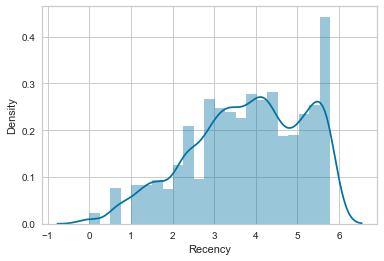

In [47]:
#Data distribution after data normalization for Recency
Recency_Plot = Log_Tfd_Data['Recency']
ax = sns.distplot(Recency_Plot)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


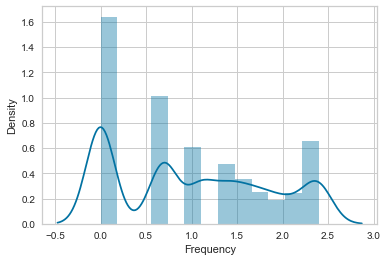

In [48]:
#Data distribution after data normalization for Frequency
Frequency_Plot = Log_Tfd_Data.query('Frequency < 1000')['Frequency']
ax = sns.distplot(Frequency_Plot)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


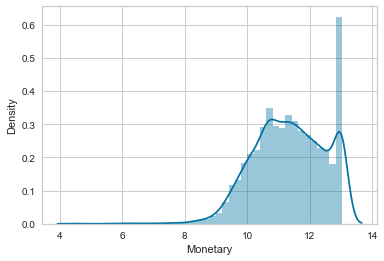

In [49]:
#Data distribution after data normalization for Monetary
Frequency_Plot = Log_Tfd_Data.query('Monetary < 1000')['Monetary']
ax = sns.distplot(Frequency_Plot)

In [50]:
#Bring the data on same scale
scaleobj = StandardScaler()
Scaled_Data = scaleobj.fit_transform(rfm_df.iloc[:,0:3])

In [51]:
rfm_df[['Recency','Frequency','Monetary']].describe()

,Recency,Frequency,Monetary
count,4319.000,4319.000,4319.000
mean,91.014,3.892,145032.489
std,96.506,3.273,142162.961
min,1.000,1.000,96.000
25%,18.000,1.000,38585.000
50%,51.000,3.000,84965.000
75%,141.000,5.000,206819.000
max,325.500,11.000,459170.000


In [52]:
#Transform it back to dataframe
Scaled_Data = pd.DataFrame(Scaled_Data, index = rfm_df.index, columns = Log_Tfd_Data.columns)

In [53]:
Scaled_Data.describe()

,Recency,Frequency,Monetary
count,4.319e+03,4.319e+03,4.319e+03
mean,8.281e-17,7.969e-19,1.570e-16
std,1.000e+00,1.000e+00,1.000e+00
min,-9.328e-01,-8.838e-01,-1.020e+00
25%,-7.567e-01,-8.838e-01,-7.489e-01
50%,-4.147e-01,-2.726e-01,-4.226e-01
75%,5.180e-01,3.386e-01,4.347e-01
max,2.430e+00,2.172e+00,2.210e+00


In [54]:
Scaled_Data.head()

,Recency,Frequency,Monetary
CustomerID,,,
2,-0.902,0.950,2.210
3,-0.145,0.033,0.791
4,-0.746,-0.884,0.222
5,2.280,-0.884,-0.725
6,-0.560,1.255,0.048


In [55]:
Scaled_Data.shape

(4319, 3)

In [56]:
#KMeans Model for Clustering
sum_of_sq_dist = {}
for k in range(1,11):
    km = KMeans(n_clusters= k, init= 'k-means++', max_iter= 1000, random_state=123)
    km = km.fit(Scaled_Data)
    sum_of_sq_dist[k] = km.inertia_
    if k>1:
        # Calculate Silhoutte Score#
        score = silhouette_score(Scaled_Data, km.labels_, metric='euclidean')
        # Print the score
        #
        print('For number of clusters',k,'Silhouette Score: %.3f' % score)

For number of clusters 2 Silhouette Score: 0.500
For number of clusters 3 Silhouette Score: 0.508
For number of clusters 4 Silhouette Score: 0.462
For number of clusters 5 Silhouette Score: 0.422
For number of clusters 6 Silhouette Score: 0.419
For number of clusters 7 Silhouette Score: 0.417
For number of clusters 8 Silhouette Score: 0.384
For number of clusters 9 Silhouette Score: 0.385
For number of clusters 10 Silhouette Score: 0.383


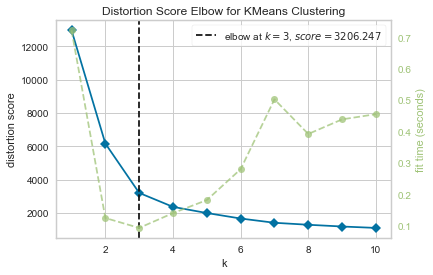

In [57]:
# Kelbow method to get best fit for clusters

visualizer=kelbow_visualizer(km,Scaled_Data,k=(1,11))

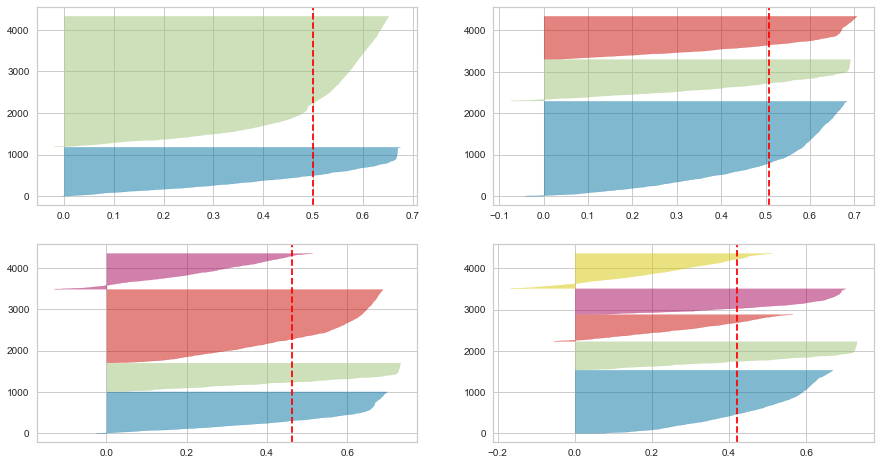

In [58]:
#SilhouetteVisualizer 
fig, ax = plt.subplots(2, 2, figsize=(15,8))
for k in [2, 3, 4, 5]:
    '''
    Create KMeans instance for different number of clusters
    '''
    km = KMeans(n_clusters= k, init= 'k-means++', max_iter= 1000, random_state=123)
    q, mod = divmod(k, 2)
    '''
    Create SilhouetteVisualizer instance with KMeans instance
    Fit the visualizer
    '''
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(Scaled_Data)
    
#Silhouette, Elbow Charts gives the optimum number of cluster as 3 with Silhouette Score 0.508

In [59]:
#Cluster Grouping
km = KMeans(n_clusters= 3, init= 'k-means++', max_iter= 1000, random_state=123)
km = km.fit(Scaled_Data)
score = silhouette_score(Scaled_Data, km.labels_, metric='euclidean')
print('For number of clusters',3,'Silhouette Score: %.3f' % score)

For number of clusters 3 Silhouette Score: 0.508


In [60]:
Scaled_Data2=Scaled_Data.copy()
Scaled_Data2['Cluster'] = km.labels_
Scaled_Data2['Silhouette_Value'] = silhouette_samples(Scaled_Data, km.labels_)
rfm_df['Silhouette_Value'] = silhouette_samples(Scaled_Data, km.labels_)

In [61]:
# 3d plot for Clusters
get_ipython().run_line_magic('matplotlib', 'qt')
fig = plt.figure(figsize=(6,6))
ax = Axes3D(fig, auto_add_to_figure=False)
fig.add_axes(ax)
# get colormap from seaborn
cmap = ListedColormap(sns.color_palette("twilight", 3).as_hex())
# plot
sc = ax.scatter(Scaled_Data2.Recency, Scaled_Data2.Frequency, Scaled_Data2.Monetary, s=40, c=Scaled_Data2.Cluster, marker='o', cmap=cmap, alpha=1)
ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary')
# legend
plt.legend(*sc.legend_elements(), bbox_to_anchor=(1.05, 1), loc=2)
# save
plt.savefig("rfm_3dplot2", bbox_inches='tight')
#plt.show()
get_ipython().run_line_magic('matplotlib', 'inline')

In [62]:
#Find the clusters for the observation given in the dataset
rfm_df['Cluster'] = km.labels_

In [63]:
rfm_df.Cluster.value_counts()

0    2287
2    1034
1     998
Name: Cluster, dtype: int64

In [64]:
rfm_df.Silhouette_Value.max()

0.7047215798349984

In [65]:
rfm_df.Silhouette_Value.min()

-0.07456879757836941

In [66]:
rfm_df.Silhouette_Value.min()

-0.07456879757836941

In [67]:
rfm_df.shape

(4319, 11)

<AxesSubplot:xlabel='Cluster', ylabel='Monetary'>

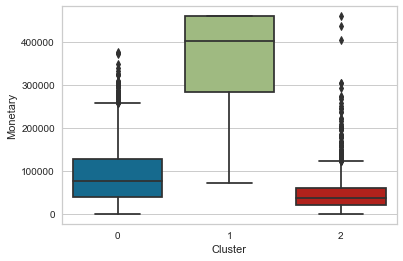

In [68]:
sns.boxplot(x='Cluster',y='Monetary',data=rfm_df)
#Cluster 1 Spends Highest and Custer 2 Spends Lowest

<AxesSubplot:xlabel='Cluster', ylabel='Frequency'>

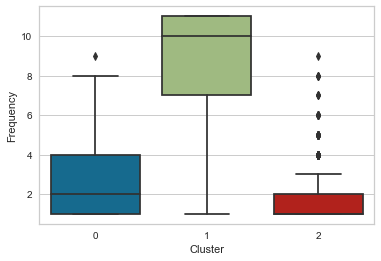

In [69]:
sns.boxplot(x='Cluster',y='Frequency',data=rfm_df)
#Cluster 1 Buys Often and Cluster 2 less Often

<AxesSubplot:xlabel='Cluster', ylabel='Recency'>

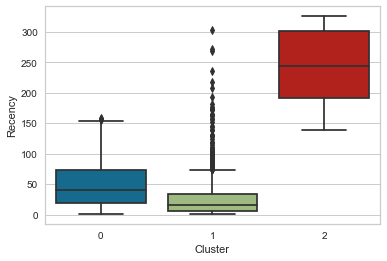

In [70]:
sns.boxplot(x='Cluster',y='Recency',data=rfm_df)
#Cluster 1 has made Recent Purchase and Cluster 2 has Old transactions

In [71]:
rfm_df1 = rfm_df.replace({'Cluster':{ 0:'Gold',1:'Platinum',2:'Silver'}})
rfm_df1.head()
rfm_df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4319 entries, 2 to 4372
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Recency            4319 non-null   float64 
 1   Frequency          4319 non-null   float64 
 2   Monetary           4319 non-null   float64 
 3   R                  4319 non-null   int64   
 4   F                  4319 non-null   int64   
 5   M                  4319 non-null   int64   
 6   RFMGroup           4319 non-null   object  
 7   RFMScore           4319 non-null   int64   
 8   RFM_Loyalty_Level  4319 non-null   category
 9   Silhouette_Value   4319 non-null   float64 
 10  Cluster            4319 non-null   object  
dtypes: category(1), float64(4), int64(4), object(2)
memory usage: 504.5+ KB


In [72]:
rfm_df1.groupby(['Cluster']).mean().sort_values(['Monetary'],ascending=False)

,Recency,Frequency,Monetary,R,F,M,RFMScore,Silhouette_Value
Cluster,,,,,,,,
Platinum,27.411,8.875,366259.013,1.612,1.135,1.085,3.833,0.482
Gold,49.465,2.721,91160.208,2.185,2.930,2.726,7.841,0.508
Silver,244.301,1.672,50662.894,3.994,3.528,3.366,10.888,0.535


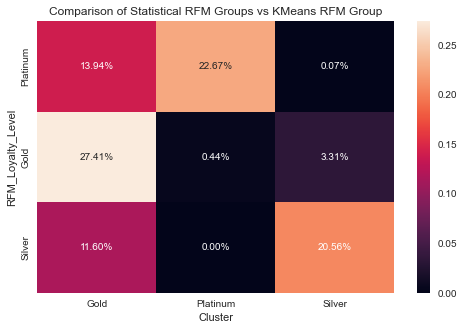

In [73]:
#Comparison of Statistical RFM Groups vs KMeans RFM Group

pd.crosstab(rfm_df1['RFM_Loyalty_Level'],rfm_df1['Cluster'])
cross_table=pd.crosstab(rfm_df1['RFM_Loyalty_Level'],rfm_df1['Cluster'])/4319*100
cross_table
fig, ax = plt.subplots(figsize=(8, 5))
sns.heatmap(cross_table/100,
                annot=True,
                fmt='.2%',
                #cmap='rocket_r',
                #linewidths=.5,
                ax=ax)
ax.set_title("Comparison of Statistical RFM Groups vs KMeans RFM Group")
plt.show()


In [74]:
rfm_df1.to_excel("Final Data.xlsx")

In [75]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram

In [76]:
agglo = AgglomerativeClustering(n_clusters=3, compute_distances=True).fit(Scaled_Data)

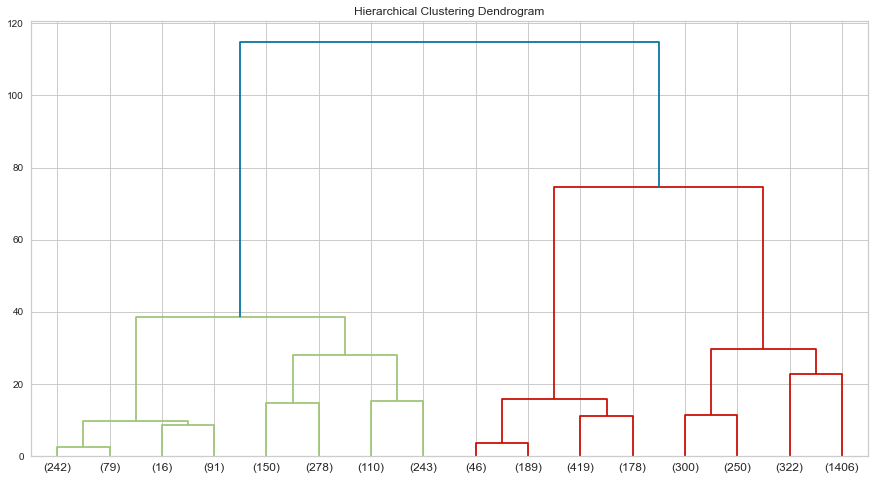

In [77]:
def plot_dendrogram(agglo, **kwargs):
    
    counts = np.zeros(agglo.children_.shape[0])
    n_samples = len(agglo.labels_)
    for i, merge in enumerate(agglo.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([agglo.children_, agglo.distances_, counts]).astype(float)

    dendrogram(linkage_matrix, **kwargs)
    

plt.figure(figsize=(15,8))
plt.title('Hierarchical Clustering Dendrogram')
plot_dendrogram(agglo, truncate_mode='level', p=3)
plt.show()

In [78]:
# creating a list of labels generated by the kmeans model
labels_kmeans = list(km.labels_)

# creating a list of labels generated by the agglomerative clustering model
labels_agglo = list(agglo.labels_)

In [79]:
# printing the size of the kmeans clusters
print('Cluster 0 - KMeans: ', labels_kmeans.count(0))
print('Cluster 1 - KMeans: ', labels_kmeans.count(1))
print('Cluster 2 - KMeans: ', labels_kmeans.count(2))


print()

# printing the size of the agglomerative clusters
print('Cluster 0 - Agglomerative: ', labels_agglo.count(0))
print('Cluster 1 - Agglomerative: ', labels_agglo.count(1))
print('Cluster 2 - Agglomerative: ', labels_agglo.count(2))

Cluster 0 - KMeans:  2287
Cluster 1 - KMeans:  998
Cluster 2 - KMeans:  1034

Cluster 0 - Agglomerative:  1209
Cluster 1 - Agglomerative:  2278
Cluster 2 - Agglomerative:  832


In [80]:
silhouette_score(Scaled_Data, agglo.labels_)

0.48301708142765554